In [1]:
import numpy
import matplotlib.pyplot
%matplotlib inline
from MyNeuralNet_updated import neuralNetwork

epoch=2
input_nodes=784
hidden_nodes=100
output_nodes=10

learning_rate=0.02

n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

data_file=open("mnist_train.csv",'r')
data_list=data_file.readlines()
data_file.close()

for e in range(epoch):
    for record in data_list:
        all_values=record.split(',')
        scaled_inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(scaled_inputs,targets)
    pass
pass


#all_values=data_list[1].split(',')
#image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')


#scaled_input=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
#image_array=scaled_input.reshape((28,28))
#matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

#creating target matrinx

#onodes=10
#targets=numpy.zeros(onodes)+0.01
#targets[int(all_values[0])]=0.99
#test_all_values=test_data_list[1].split(',')
#print(test_all_values[0])
#image_array=numpy.asfarray(test_all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')
#n.query((numpy.asfarray(test_all_values[1:])/255.0*0.99)+0.01)




In [2]:
test_data_file=open("mnist_test_10.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

##test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []
# go through all the records in the test data set
for record in test_data_list:
    
     # split the record by the ',' commas
    all_values = record.split(',')
     # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
     # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
     # query the network
    outputs = n.query(inputs)
     # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "network's answer")
   # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
    pass
pass

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
6 network's answer
9 correct label
9 network's answer


In [3]:
print(scorecard)
scorecard_array=numpy.asfarray(scorecard)
print("performance=", scorecard_array.sum()/scorecard_array.size)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
performance= 0.9


In [2]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


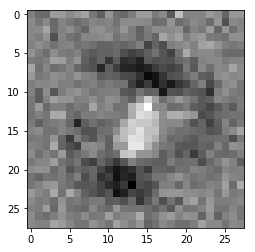

In [6]:

# label to test
label = 2
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')